In [39]:
#import libraries

import pandas as pd                    
import numpy as np                     
import matplotlib.pyplot as plt        
import seaborn as sns                  
import warnings
warnings.filterwarnings('ignore')

In [40]:
#reading data set and view top 5 rows

df=pd.read_csv('Fraud.csv')
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [41]:
#view bottom 5 rows

df.tail(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [42]:
# check the number of rows and columns in the dataset

df.shape

(6362620, 11)

In [43]:
# get an info summary of df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [44]:
#returns the sum of null or missing values for each column

df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [45]:
#calculates the percentage of authentic and fraudulent transactions in the dataset

authentic = len(df[df.isFraud == 0]) #count the number of rows where the 'isFraud' column is 0
fraud = len(df[df.isFraud == 1])      #count the number of rows where the 'isFraud' column is 1
authentic_perc=(authentic)/(authentic+fraud)*100
fraud_perc=(fraud)/(fraud+authentic)*100

In [46]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

<AxesSubplot:>

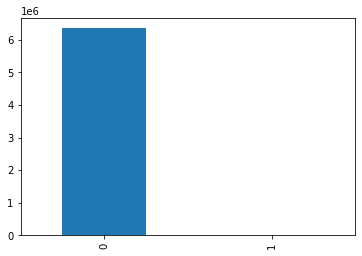

In [47]:
df['isFraud'].value_counts().plot(kind='bar')

In [48]:
print("Total authentic transactions:",authentic)
print("Total fraudulent transactions:",fraud)
print("Percentage of authentic transactions: {:.2f} %".format(authentic_perc))
print("Percentage of fraudulent transactions:{:.2f}%".format(fraud_perc))

Total authentic transactions: 6354407
Total fraudulent transactions: 8213
Percentage of authentic transactions: 99.87 %
Percentage of fraudulent transactions:0.13%


<AxesSubplot:>

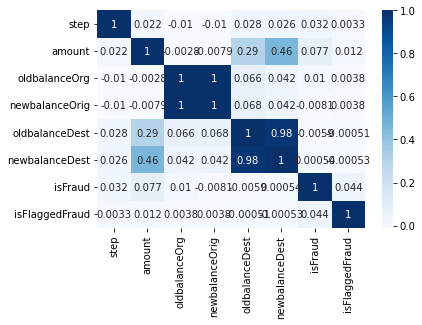

In [49]:
#columns which have highly multicolinearity

corre=df.corr()
sns.heatmap(corre,annot=True,cmap='Blues')

In [11]:
#Problem solving

In [50]:
#creating a copy of dataset to train & test models

new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [51]:
# Checking how many attributes are an object datatype

objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [53]:
#Label encoding for object to numeric conversion

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


In [54]:
#reading new data set and view top 5 rows

new_df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,6084274,170136.00,160296.36,735664,0.0,0.00,0,0
1,1,3,1864.28,1321111,21249.00,19384.72,815475,0.0,0.00,0,0
2,1,4,181.00,2401,181.00,0.00,2099792,0.0,0.00,1,0
3,1,1,181.00,5364739,181.00,0.00,2046471,21182.0,0.00,1,0
4,1,3,11668.14,2717760,41554.00,29885.86,2532274,0.0,0.00,0,0
5,1,3,7817.71,5585032,53860.00,46042.29,1385802,0.0,0.00,0,0
6,1,3,7107.77,895500,183195.00,176087.23,1181519,0.0,0.00,0,0
7,1,3,7861.64,2221304,176087.23,168225.59,1460014,0.0,0.00,0,0
8,1,3,4024.36,6207910,2671.00,0.00,2465631,0.0,0.00,0,0
9,1,2,5337.77,4896977,41720.00,36382.23,1925654,41898.0,40348.79,0,0


In [18]:
#MULTICOLINEARITY

In [55]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

,variables,VIF
0,step,3.221074
1,type,2.556676
2,amount,4.110298
3,nameOrig,3.236811
4,oldbalanceOrg,574.777410
5,newbalanceOrig,580.814577
6,nameDest,3.595660
7,oldbalanceDest,73.554341
8,newbalanceDest,85.139876
9,isFraud,1.195846


In [56]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

,variables,VIF
0,type,2.218584
1,amount,3.897307
2,isFraud,1.186643
3,isFlaggedFraud,1.002573
4,Actual_amount_orig,1.319910
5,Actual_amount_dest,3.773877
6,TransactionPath,2.302236


<AxesSubplot:>

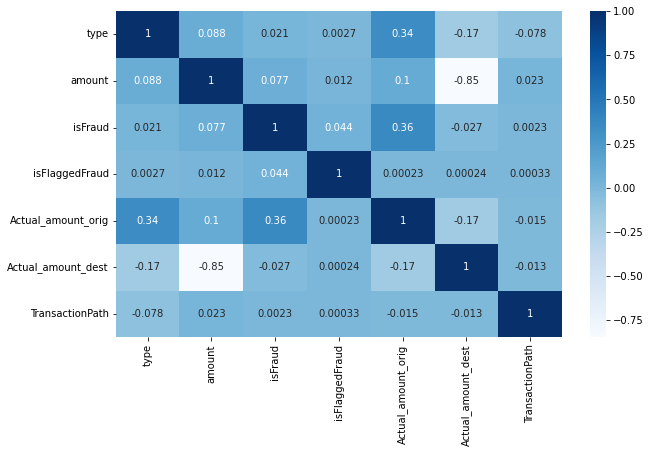

In [57]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True, cmap='Blues')

In [58]:
#MODEL BUILDING

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [60]:
# Perform Scaling

scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)


In [65]:
# Split the data

(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)


Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


In [68]:
#Model Training

In [69]:
# Decision tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [71]:
print("Decision Tree Score: ", decision_tree_score)


Decision Tree Score:  99.92445460098722


In [72]:
print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

TP,FP,TN,FN - Decision Tree
True Positives: 1720
False Positives: 727
True Negatives: 1905624
False Negatives: 715
----------------------------------------------------------------------------------------


In [73]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

Confusion Matrix - Decision Tree
[[1905624     727]
 [    715    1720]]
----------------------------------------------------------------------------------------


In [74]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.70      0.71      0.70      2435

    accuracy                           1.00   1908786
   macro avg       0.85      0.85      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786

----------------------------------------------------------------------------------------


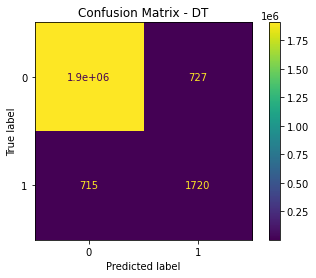

In [75]:
# visualising confusion matrix - DT


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

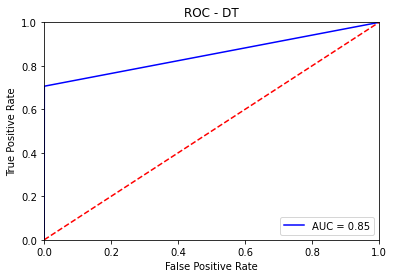

In [76]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()